<a href="https://colab.research.google.com/github/Roll1ngo/Authorization_and_authentication_synopsis/blob/master/Hw3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1005]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Готуємо данні до роботи

In [1006]:
data_source = pd.read_csv('Housing.csv')
data = data_source.copy()
print(data.shape)
data = data.drop_duplicates()
print(data.shape)

(545, 13)
(545, 13)


In [1007]:
data.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1008]:
print(data.isnull().sum())


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [1009]:
data.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

## Обробляємо категоріальні данні

In [1010]:
label_encoders = {}
categorical_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
mappings = {}

furnishingstatus_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}

#Обробляємо категоріальні данні
for column in categorical_columns:
    if column == 'furnishingstatus':
        data[column] = data[column].map(furnishingstatus_mapping)
        mappings[column] = furnishingstatus_mapping
    else:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        mappings[column] = mapping
# Друкуємо маппінг

for column, mapping in mappings.items():
    print(f"Mapping for {column}:")
    for class_value, class_label in mapping.items():
        print(f"{class_value} -> {class_label}")

# Записуємо маппінг до  CSV файлу
mappings_data = pd.DataFrame([
    {'column': col, 'category': k, 'code': v}
    for col, map_dict in mappings.items()
    for k, v in map_dict.items()
])

mappings_data.to_csv('mappings.csv', index=False)

Mapping for mainroad:
no -> 0
yes -> 1
Mapping for guestroom:
no -> 0
yes -> 1
Mapping for basement:
no -> 0
yes -> 1
Mapping for hotwaterheating:
no -> 0
yes -> 1
Mapping for airconditioning:
no -> 0
yes -> 1
Mapping for prefarea:
no -> 0
yes -> 1
Mapping for furnishingstatus:
unfurnished -> 0
semi-furnished -> 1
furnished -> 2


In [1011]:
data.dtypes


price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int64
guestroom           int64
basement            int64
hotwaterheating     int64
airconditioning     int64
parking             int64
prefarea            int64
furnishingstatus    int64
dtype: object

In [1012]:
data.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,2
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0


## Дивимось на корреляції

area                0.535997
bedrooms            0.366494
bathrooms           0.517545
stories             0.420712
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
airconditioning     0.452954
parking             0.384394
prefarea            0.329777
furnishingstatus    0.304721
Name: price, dtype: float64


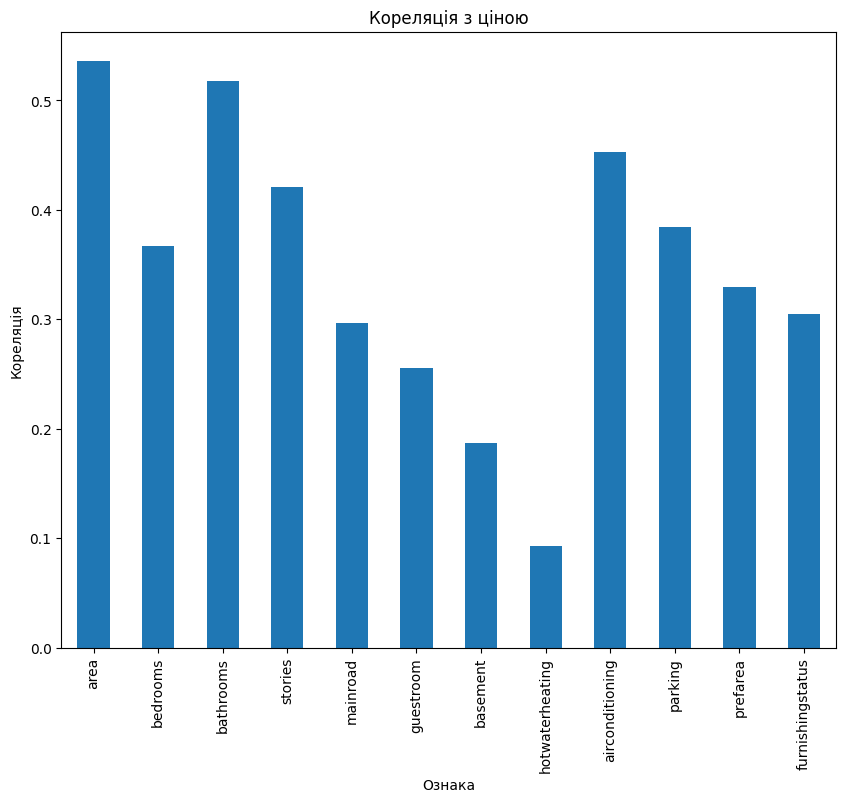

In [1013]:
correlation_matrix = data.corr()
correlations_with_price = correlation_matrix['price'].drop('price')
print(correlations_with_price)

correlations_with_price.plot(kind='bar',figsize=(10,8))
plt.title('Кореляція з ціною')
plt.xlabel('Ознака')
plt.ylabel('Кореляція')
plt.show()

## Функція гіпотези лінійної регресії у векторному вигляді

In [1014]:
def hypotesa(w_0, w_1, x):
  return w_0 + w_1*x


## Функція для обчислення функції втрат у векторному вигляді

In [1015]:

def mean_squared_error(y_true, y_predicted):
    return np.mean((y_predicted - y_true)**2)

# Реалізуємо один крок градієнтного спуску

In [1016]:
def gradient_descent(x, y, learning_rate=0.0001):
    slope = 0.1
    intercept = 1.01
    n = float(len(x))

    y_predicted = (slope * x) + intercept
    cost = mean_squared_error(y, y_predicted)

    slope_derivative = -(2/n) * sum(x * (y-y_predicted))
    intercept_derivative = -(2/n) * sum(y-y_predicted)

    slope = slope - (learning_rate * slope_derivative)
    intercept = intercept - (learning_rate * intercept_derivative)

    return slope, intercept, cost


x_train = data['area']
y_train = data['price']

slope, intercept, cost = gradient_descent(x_train, y_train, learning_rate=0.0001)
print(f"Один крок градієнтного спуску: Slope = {slope}, Intercept = {intercept}, Cost = {cost}")

Один крок градієнтного спуску: Slope = 5343958.490683545, Intercept = 954.2526367155863, Cost = 26208478829846.33


## Знаходимо найкращі параметри 𝑤⃗
  для датасету прогнозуючу ціну на будинок залежно від усіх наявних параметрів

In [1017]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error


X = data[['area','bedrooms', 'bathrooms']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)




print("W_1", regressor.coef_)
print("W_0:", regressor.intercept_.round())
print("loss на тренувальних даних:", regressor.score(X_train, y_train).round(2))
print("loss на тестових даних:", regressor.score(X_test, y_test).round(2))
for real, predict in zip(y_test, y_pred):
  print(f'Predict: {predict.round()} | Real: {real}')





W_1 [3.80072068e+02 3.96619532e+05 1.41015652e+06]
W_0: -166206.0
loss на тренувальних даних: 0.49
loss на тестових даних: 0.49
Predict: 4087122.0 | Real: 2835000
Predict: 3572680.0 | Real: 3325000
Predict: 3557478.0 | Real: 3605000
Predict: 3337036.0 | Real: 3780000
Predict: 3405449.0 | Real: 2590000
Predict: 7178453.0 | Real: 7343000
Predict: 5929127.0 | Real: 4760000
Predict: 3040580.0 | Real: 2835000
Predict: 4271662.0 | Real: 3290000
Predict: 3862880.0 | Real: 4550000
Predict: 3399368.0 | Real: 3710000
Predict: 6771865.0 | Real: 5652500
Predict: 5569403.0 | Real: 4193000
Predict: 6124398.0 | Real: 7210000
Predict: 5094313.0 | Real: 5803000
Predict: 5570837.0 | Real: 9240000
Predict: 6651586.0 | Real: 3850000
Predict: 4785199.0 | Real: 3640000
Predict: 6521017.0 | Real: 7700000
Predict: 4524205.0 | Real: 4200000
Predict: 3665242.0 | Real: 3010000
Predict: 3574025.0 | Real: 3115000
Predict: 6580484.0 | Real: 6300000
Predict: 7074578.0 | Real: 8960000
Predict: 6749061.0 | Real: 54600

# Аналітичний метод

In [1018]:
X = data[['area','bedrooms', 'bathrooms']]
y = data['price']
X = np.c_[np.ones(X.shape[0]), X]
X = np.array(X)
y = np.array(y).reshape(-1, 1)
w_analyt = np.linalg.inv(X.T @ X) @ X.T @ y
print("w_0:\n", w_analyt[0])
print("w_1:\n", w_analyt[1:])

w_0:
 [-173171.60763264]
w_1:
 [[3.78762754e+02]
 [4.06820034e+05]
 [1.38604950e+06]]


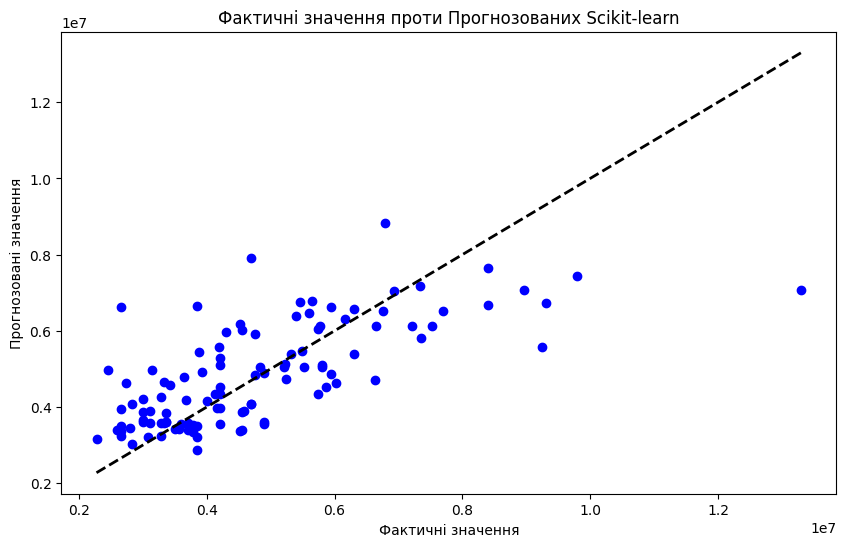

In [1019]:
model_graph = pd.DataFrame(y_pred.round(), y_test)
model_graph
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Фактичні значення проти Прогнозованих Scikit-learn')
plt.show()

## Порівняння отриманих результатів.

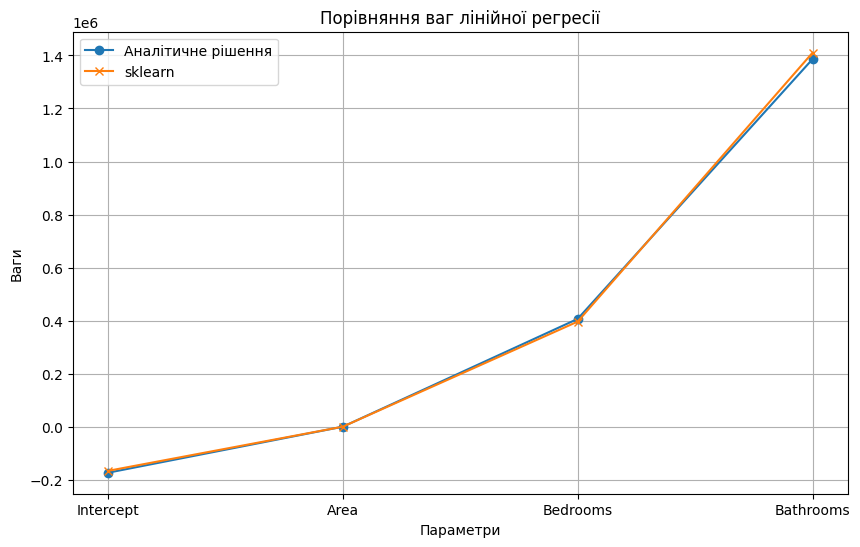

In [1020]:
coef_sklearn = regressor.coef_.tolist()
coef_sklearn.insert(0,regressor.intercept_)

w_analyt_for_g = [-1.73171608e+05, 3.78762754e+02, 4.06820034e+05, 1.38604950e+06]
labels = ['Intercept', 'Area', 'Bedrooms', 'Bathrooms']
plt.figure(figsize=(10, 6))
plt.plot(labels, w_analyt, marker='o', label='Аналітичне рішення')
plt.plot(labels, coef_sklearn, marker='x', label='sklearn')
plt.title('Порівняння ваг лінійної регресії')
plt.xlabel('Параметри')
plt.ylabel('Ваги')
plt.legend()
plt.grid(True)

# Показати графік
plt.show()
